In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.signal import butter, freqz,lfilter

In [3]:
df = pd.read_csv('500.txt', sep="\t" ,header =[0,1])

In [7]:
df.head()

,Elapsed time,MLII,V5
,(seconds),(mV),(mV)
0,0.000,-0.145,-0.065
1,0.003,-0.145,-0.065
2,0.006,-0.145,-0.065
3,0.008,-0.145,-0.065
4,0.011,-0.145,-0.065


In [4]:
t = df.iloc[:1000, 0] 
sig = df.iloc[:1000, 1]

In [5]:
def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='lowpass', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [6]:
order = 1
fs = 1/(t.iloc[2] - t.iloc[1])
cutoff = 15

In [7]:
b, a = butter_lowpass(cutoff, fs, order)
w, h = freqz(b, a)

In [15]:
def FreqResp (cutoff,order):
    b, a = butter_lowpass(cutoff, fs, order)
    w, h = freqz(b, a)
    ax=plt.figure(figsize=(10,7)).gca()
    ax.tick_params(labelsize=20)
    plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
    plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
    plt.axvline(cutoff, color='k')
    plt.xlim(0, 0.5*fs)
    plt.title("AЧХ",fontsize=25)
    plt.xlabel('Частота [Гц]',fontsize=25)
    plt.ylabel('Отношение амплитуд',fontsize=25)
    plt.grid()

In [11]:
def ECG(cutoff, order):
    y = butter_lowpass_filter(sig, cutoff, fs, order)
    ax=plt.figure(figsize=(30,20)).gca()
    ax.tick_params(labelsize=20)
    plt.plot(t, sig, 'blueviolet', linewidth=3.5,label='сырые данные')
    plt.plot(t, y, 'g-', linewidth=6, label='фильтрованные данные')
    plt.legend(fontsize=35)
    plt.xlabel('Время [с]',fontsize=40)
    
    plt.grid()

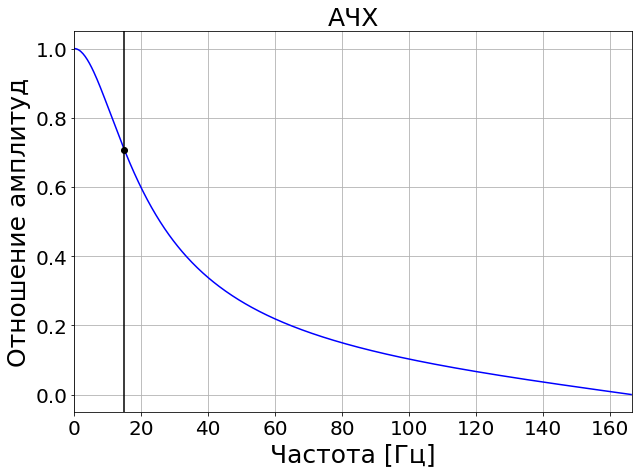

In [16]:
FreqResp(cutoff,order)

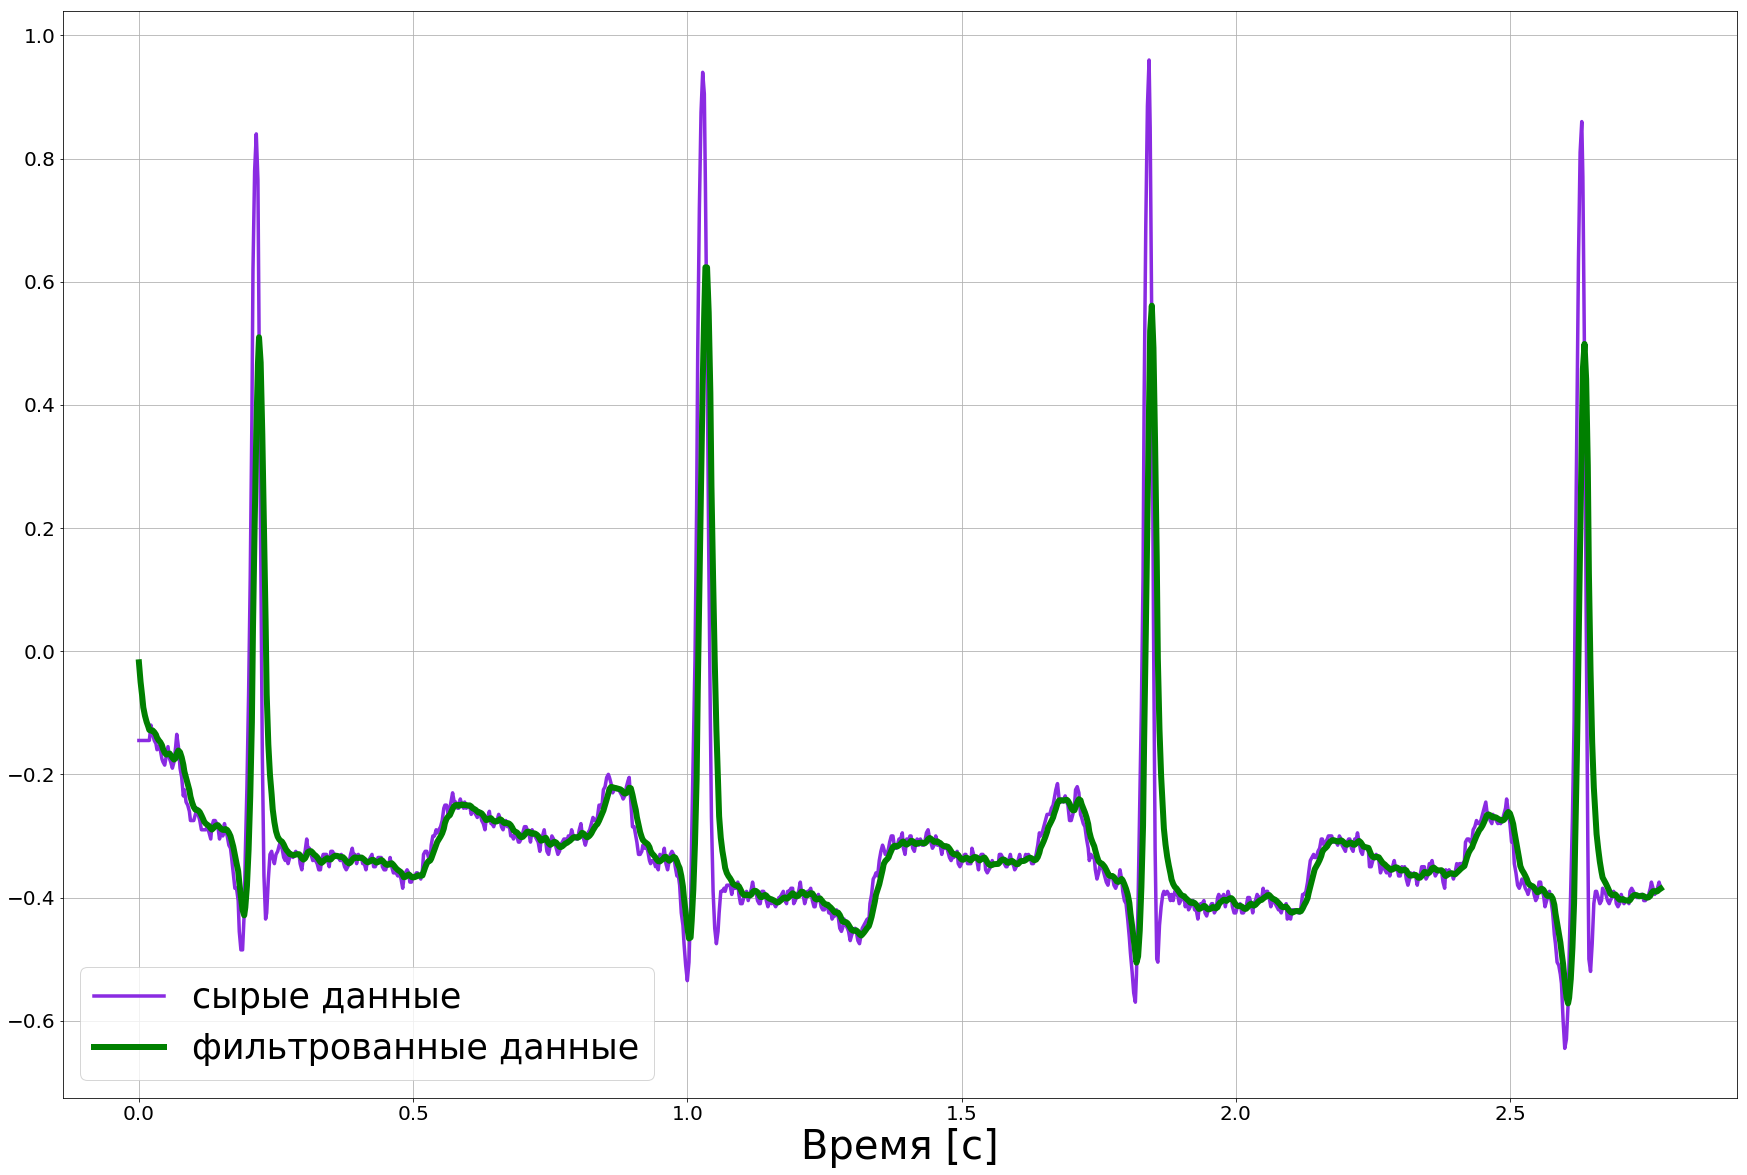

In [91]:
ECG(cutoff,order)

In [17]:
def Smooth_Spectr(cutoff, order): 
    y = butter_lowpass_filter(sig, cutoff, fs, order)
    f, Pxx_den = signal.welch(y, fs, nperseg=1000,scaling='spectrum')
    filtered = lowess(Pxx_den, f, is_sorted=True,frac=0.09, it=0 )
    plt.figure(figsize=(13,10))
    plt.semilogy(filtered[:,0],filtered[:,1],'r',linewidth=6)
    plt.semilogy(f, Pxx_den,'blue',linewidth=1)
    
    plt.xlabel('Частота [Гц]',fontsize=25)
    plt.ylabel('Спектральная плотность',fontsize=25)

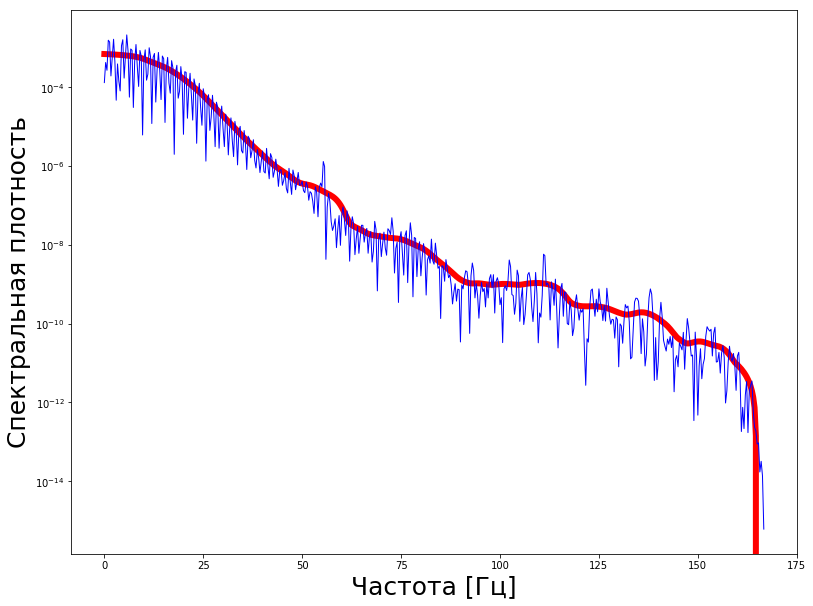

In [18]:
Smooth_Spectr(cutoff, order)

In [19]:
def filt(cutoff,order):
    y = butter_lowpass_filter(sig, cutoff, fs, order)
    return y

In [20]:
f1, Pxx_den1 = signal.welch(filt(15,1), fs, nperseg=1000,scaling='spectrum')
f2, Pxx_den2 = signal.welch(filt(30,1), fs, nperseg=1000,scaling='spectrum')
f3, Pxx_den3 = signal.welch(filt(60,1), fs, nperseg=1000,scaling='spectrum')
f4, Pxx_den4 = signal.welch(filt(100,1), fs, nperseg=1000,scaling='spectrum')
filtered1 = lowess(Pxx_den1, f1, is_sorted=True,frac=0.09, it=0 )
filtered2 = lowess(Pxx_den2, f2, is_sorted=True,frac=0.09, it=0 )
filtered3 = lowess(Pxx_den3, f3, is_sorted=True,frac=0.09, it=0 )
filtered4 = lowess(Pxx_den4, f4, is_sorted=True,frac=0.09, it=0 )

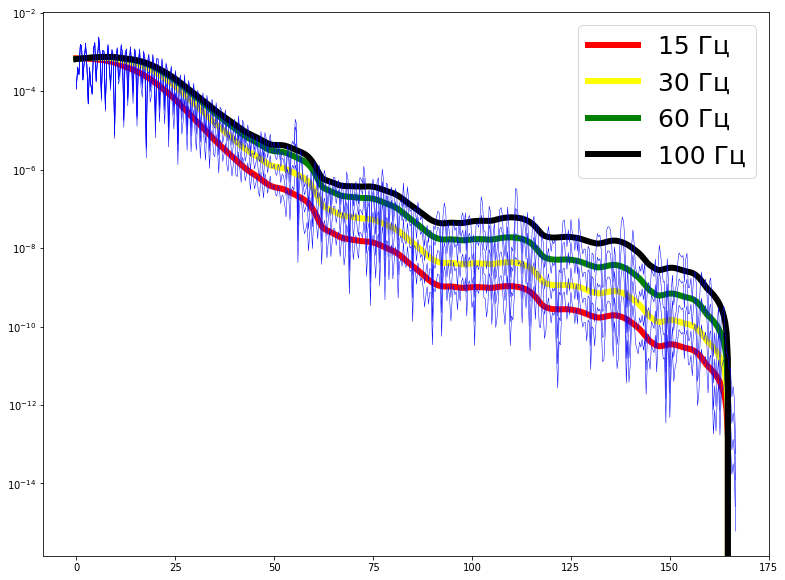

In [21]:
plt.figure(figsize=(13,10))
plt.semilogy(filtered1[:,0],filtered1[:,1],'r',linewidth=6,label='15 Гц')
plt.semilogy(f1, Pxx_den1,'blue',linewidth=0.5)
plt.semilogy(filtered2[:,0],filtered2[:,1],'yellow',linewidth=6,label='30 Гц')
plt.semilogy(f2, Pxx_den2,'blue',linewidth=0.5,)
plt.semilogy(filtered3[:,0],filtered3[:,1],'g',linewidth=6,label='60 Гц')
plt.semilogy(f3, Pxx_den3,'blue',linewidth=0.5)
plt.semilogy(filtered4[:,0],filtered4[:,1],'black',linewidth=6,label='100 Гц')
plt.semilogy(f4, Pxx_den4,'blue',linewidth=0.5)
plt.legend(fontsize=25)